In [1]:
import requests
import matplotlib.pyplot as plt

In [2]:
secret_key = '1331cb77140861545cded685f0e2bb7b78336bae51035dcccae0a1c1375e31ac'
url = 'https://serpapi.com/search.json?'
params = {
    'engine': 'google_scholar',
    'q': None,
    'as_ylo': None,
    'as_yhi': None,
    'api_key': secret_key,
    'hl': 'en'}
queries = [
    '+non+invasive+bci',
    '-non+invasive+bci'
]

In [16]:
res = {}
for query in queries:
    print(query, end = ': ')
    res[query] = []
    params['q'] = query
    for year in range(2010, 2022):
        print(year, end = ' ')
        params['as_ylo'] = year
        params['as_yhi'] = year
        r = requests.get(url = url, params = params)
        data = r.json()
        try:
            tot_res = int(data['search_information']['total_results'])
            print(f'({tot_res})', end = ' - ')
            res[query].append(tot_res)
        except KeyError:
            print(0, end = ' - ')
    print('')

+non+invasive+bci: 2010 (748) - 2011 (932) - 2012 (1180) - 2013 (1450) - 2014 (1600) - 2015 (1700) - 2016 (1820) - 2017 (2050) - 2018 (2330) - 2019 (2380) - 2020 (2600) - 2021 (1840) - 
-non+invasive+bci: 2010 (90) - 2011 (81) - 2012 (88) - 2013 (115) - 2014 (140) - 2015 (134) - 2016 (145) - 2017 (165) - 2018 (156) - 2019 (161) - 2020 (156) - 2021 (122) - 


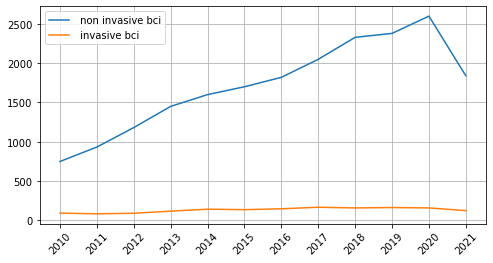

In [20]:
plt.figure(figsize=(8, 4))
for key in res.keys():
    plt.plot(res[key], label=key.replace('+', ' ').replace('-non', ''))
plt.xticks(list(range(12)), list(range(2010,2022)), rotation=45)
plt.legend()
plt.grid()
plt.savefig('plots/literature_review.png')
plt.show()